In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from keras.models import Sequential, Model
import glob
import cv2
import random

import tensorflow as tf

#print versions
print('tensorflow version',tf.__version__)

tensorflow version 2.4.1


In [2]:
import imgaug as aug
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mimg
import imgaug.augmenters as iaa
from os import listdir, makedirs, getcwd, remove
from os.path import isfile, join, abspath, exists, isdir, expanduser
from PIL import Image
from pathlib import Path
from skimage.io import imread
from skimage.transform import resize
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator,load_img, img_to_array
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Input, Flatten, SeparableConv2D
from keras.layers import GlobalMaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import Concatenate
from keras.models import Model
from keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import cv2
from keras import backend as K
color = sns.color_palette()
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Conv2D, Activation, Dense, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential

In [4]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 180
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [5]:
train = get_training_data('C:/Users/Administrateur/OneDrive/Formation DATASCIENCE/Projet DATA SCIENCE/chest_xray/train')
test = get_training_data('C:/Users/Administrateur/OneDrive/Formation DATASCIENCE/Projet DATA SCIENCE/chest_xray/test')
val = get_training_data('C:/Users/Administrateur/OneDrive/Formation DATASCIENCE/Projet DATA SCIENCE/chest_xray/val')

<ipython-input-4-a0442f890243>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data)


In [6]:
train_path = 'C:/Users/Administrateur/OneDrive/Formation DATASCIENCE/Projet DATA SCIENCE/chest_xray/train'
test_path = 'C:/Users/Administrateur/OneDrive/Formation DATASCIENCE/Projet DATA SCIENCE/chest_xray/test'
val_path = 'C:/Users/Administrateur/OneDrive/Formation DATASCIENCE/Projet DATA SCIENCE/chest_xray/val'

In [7]:
IMG_SIZE = 180
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

In [8]:
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [9]:
x_train = x_train.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y_test = np.array(y_test)

x_global = np.concatenate((x_train,x_test),axis=0)
y_global = np.concatenate((y_train,y_test),axis=0)


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(x_global, y_global, test_size=0.33, random_state=42)

label =  0


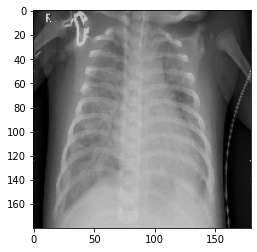

In [11]:
plt.imshow(x_train[0].reshape(180,180), cmap='gray')
print('label = ', Y_train[0])

In [12]:
print(len(X_train))
print(len(x_val))
print(len(X_test))

3912
16
1928


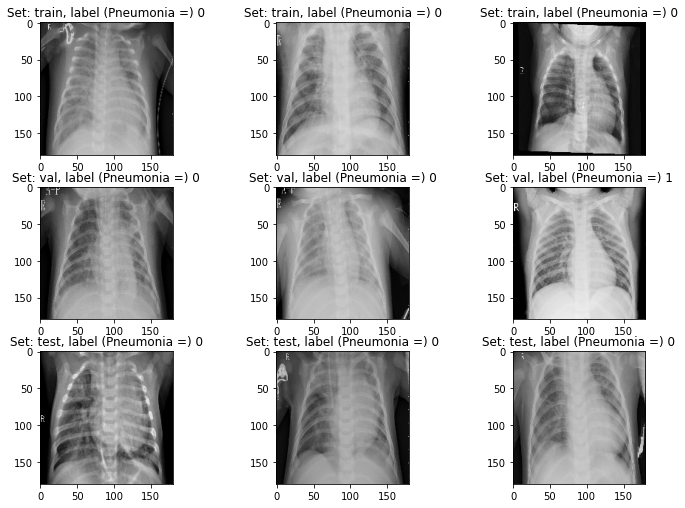

In [13]:
fig, ax = plt.subplots(3, 3, figsize=(10, 7))
ax = ax.ravel()
plt.tight_layout()

for i in range(3):
  random_index = random.randint(0, min(len(x_train), len(x_val), len(x_test)))
  ax[i].imshow(x_train[random_index].reshape(180,180), cmap='gray')
  ax[i].set_title('Set: train, label (Pneumonia =) {}'.format(y_train[random_index]))

  ax[i+3].imshow(x_val[random_index].reshape(180,180), cmap='gray')
  ax[i+3].set_title('Set: val, label (Pneumonia =) {}'.format(y_val[random_index]))

  ax[i+6].imshow(x_test[random_index].reshape(180,180), cmap='gray')
  ax[i+6].set_title('Set: test, label (Pneumonia =) {}'.format(y_test[random_index]))

In [46]:

model = Sequential()

model.add(Conv2D(32, (3, 3), padding="same", input_shape=X_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
#model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
#model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))
#model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Dropout(0.2))

model.add(Activation("sigmoid"))

model.compile(loss='binary_crossentropy', # loss function
              optimizer='adam',                # optimization algorithm
              metrics=['accuracy'])  

In [47]:
training_history = model.fit(X_train, Y_train,
                             validation_split = 0.2,
                             epochs = 10,
                             batch_size = 200)
scores = model.evaluate(X_test, Y_test)

Epoch 1/10
16/16 [==============================] - 256s 16s/step - loss: 1.9368 - accuracy: 0.5417 - val_loss: 0.6883 - val_accuracy: 0.7254
Epoch 2/10
16/16 [==============================] - 246s 15s/step - loss: 0.6598 - accuracy: 0.7169 - val_loss: 0.5891 - val_accuracy: 0.7254
Epoch 3/10
16/16 [==============================] - 237s 15s/step - loss: 0.5764 - accuracy: 0.7243 - val_loss: 0.5058 - val_accuracy: 0.7254
Epoch 4/10
16/16 [==============================] - 238s 15s/step - loss: 0.4330 - accuracy: 0.7724 - val_loss: 0.2863 - val_accuracy: 0.8825
Epoch 5/10
16/16 [==============================] - 250s 16s/step - loss: 0.2670 - accuracy: 0.8843 - val_loss: 0.3226 - val_accuracy: 0.8480
Epoch 6/10
16/16 [==============================] - 252s 16s/step - loss: 0.2283 - accuracy: 0.9025 - val_loss: 0.2231 - val_accuracy: 0.9080
Epoch 7/10
 6/16 [==========>...................] - ETA: 2:23 - loss: 0.1891 - accuracy: 0.9193

KeyboardInterrupt: 

In [19]:
model.save("cnn.model.ModeleDeepLeaning7")

INFO:tensorflow:Assets written to: cnn.model.ModeleDeepLeaning7\assets


In [48]:
def print_results(y_test, y_pred):
    print('Accuracy   : {:.5f}'.format(accuracy_score(y_pred , y_test))) 
    print('AUC        : {:.5f}'.format(roc_auc_score(y_test , y_pred)))
    print('Precision  : {:.5f}'.format(precision_score(y_test , y_pred)))
    print('Recall     : {:.5f}'.format(recall_score(y_test , y_pred)))
    print('F1         : {:.5f}'.format(f1_score(y_test , y_pred)))
    print('Confusion Matrix : \n', confusion_matrix(y_test, y_pred))

In [49]:
predictions = model.predict(x=x_test)
y_pred = np.round(predictions).reshape(1,-1)[0]

In [50]:
print_results(y_test, y_pred)

Accuracy   : 0.79808
AUC        : 0.73419
Precision  : 0.96552
Recall     : 0.47863
F1         : 0.64000
Confusion Matrix : 
 [[386   4]
 [122 112]]


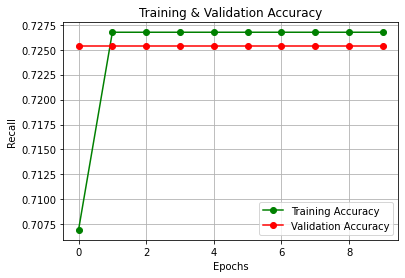

In [45]:
epochs_array = [i for i in range(len(training_history.history['accuracy']))]
fig = plt.figure()
train_acc = training_history.history['accuracy']
val_acc = training_history.history['val_accuracy']

plt.plot(epochs_array, train_acc, 'go-', label='Training Accuracy')
plt.plot(epochs_array, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.grid(True)
plt.show()

In [ ]:
model_ft.save('ModeleDeepLeaning7')

In [ ]:
predictions = model_ft.predict(x=x_test)
y_pred_global = np.round(predictions).reshape(1,-1)[0]

In [ ]:
print_results(y_test, y_pred_global)

In [ ]:
x_test.shape

In [ ]:
x_val.shape

In [ ]:
incorrect = np.nonzero(y_test != y_pred)[0]

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(15,15))
ax = ax.ravel()
plt.subplots_adjust(wspace=0.25, hspace=0.75)
plt.tight_layout()
i = 0
for c in incorrect[:6]:
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].imshow(x_test[c].reshape(IMG_SIZE,IMG_SIZE), cmap='gray', interpolation='none')
    ax[i].set_title('Predicted Class: {}, Actual Class: {}'.format(y_pred[c], y_test[c]))
    i += 1 


In [ ]:
epochs_array = [i for i in range(len(training_history.history['accuracy']))]
fig, ax = plt.subplots(1,4)
train_precision = training_history.history['precision']
train_recall = training_history.history['recall']
train_loss = training_history.history['loss']
train_acc = training_history.history['accuracy']

val_precision = training_history.history['val_precision']
val_recall = training_history.history['val_recall']
val_loss = training_history.history['val_loss']
val_acc = training_history.history['val_accuracy']
fig.set_size_inches(20,5)

ax[0].plot(epochs_array, train_loss, 'g-o', label='Training Loss')
ax[0].plot(epochs_array, val_loss, 'r-o', label='Validation Loss')
ax[0].set_title('Training & Validation Loss')
ax[0].legend()
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].grid(True)

ax[1].plot(epochs_array, train_precision, 'go-', label='Training Precision')
ax[1].plot(epochs_array, val_precision, 'ro-', label='Validation Precision')
ax[1].set_title('Training & Validation Precision')
ax[1].legend()
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Precision')
ax[1].grid(True)

ax[2].plot(epochs_array, train_recall, 'go-', label='Training Recall')
ax[2].plot(epochs_array, val_recall, 'ro-', label='Validation Recall')
ax[2].set_title('Training & Validation Recall')
ax[2].legend()
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Recall')
ax[2].grid(True)

ax[3].plot(epochs_array, train_acc, 'go-', label='Training Accuracy')
ax[3].plot(epochs_array, val_acc, 'ro-', label='Validation Accuracy')
ax[3].set_title('Training & Validation Accuracy')
ax[3].legend()
ax[3].set_xlabel('Epochs')
ax[3].set_ylabel('Recall')
ax[3].grid(True)
plt.show()